In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [12]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [13]:
img_width = 180
img_height = 180

In [14]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [15]:
data_cat = data_train.class_names

In [18]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    shuffle = False,
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [19]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    shuffle = False,
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


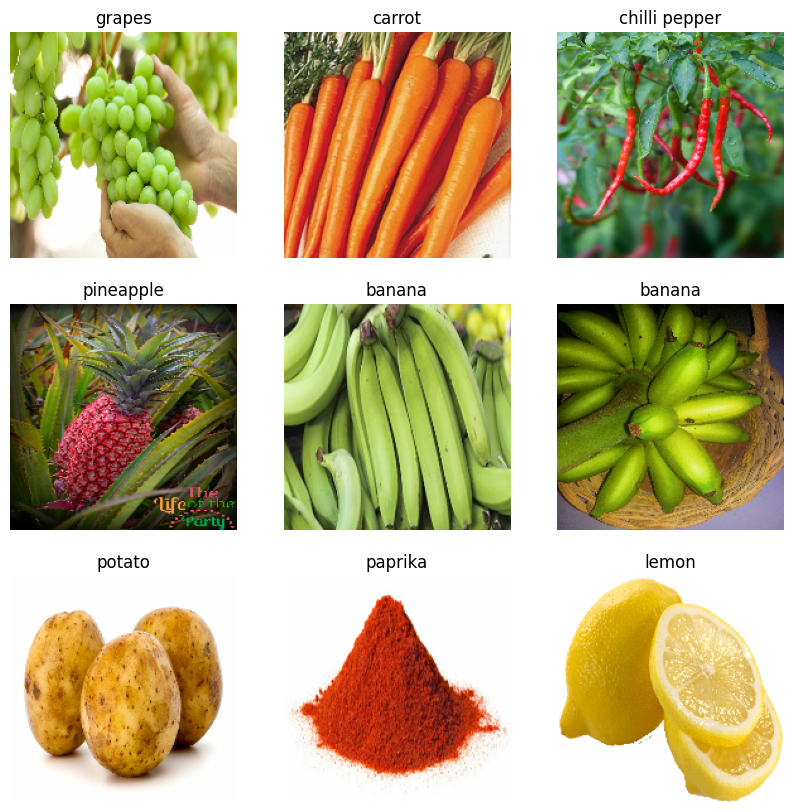

In [21]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [26]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 98s 939ms/step - loss: 3.2277 - accuracy: 0.1249 - val_loss: 2.4525 - val_accuracy: 0.2934
Epoch 2/25
98/98 [==============================] - 94s 924ms/step - loss: 2.4818 - accuracy: 0.2947 - val_loss: 1.8589 - val_accuracy: 0.4701
Epoch 3/25
98/98 [==============================] - 108s 1s/step - loss: 1.9544 - accuracy: 0.4247 - val_loss: 1.2849 - val_accuracy: 0.6638
Epoch 4/25
98/98 [==============================] - 114s 1s/step - loss: 1.4301 - accuracy: 0.5888 - val_loss: 0.7928 - val_accuracy: 0.8177
Epoch 5/25
98/98 [==============================] - 106s 1s/step - loss: 0.9504 - accuracy: 0.7236 - val_loss: 0.5797 - val_accuracy: 0.8746
Epoch 6/25
98/98 [==============================] - 100s 981ms/step - loss: 0.5392 - accuracy: 0.8469 - val_loss: 0.5622 - val_accuracy: 0.8974
Epoch 7/25
98/98 [==============================] - 98s 961ms/step - loss: 0.3513 - accuracy: 0.9088 - val_loss: 0.4670 - val_accuracy: 0.9174
Epoc

Text(0.5, 1.0, 'Loss')

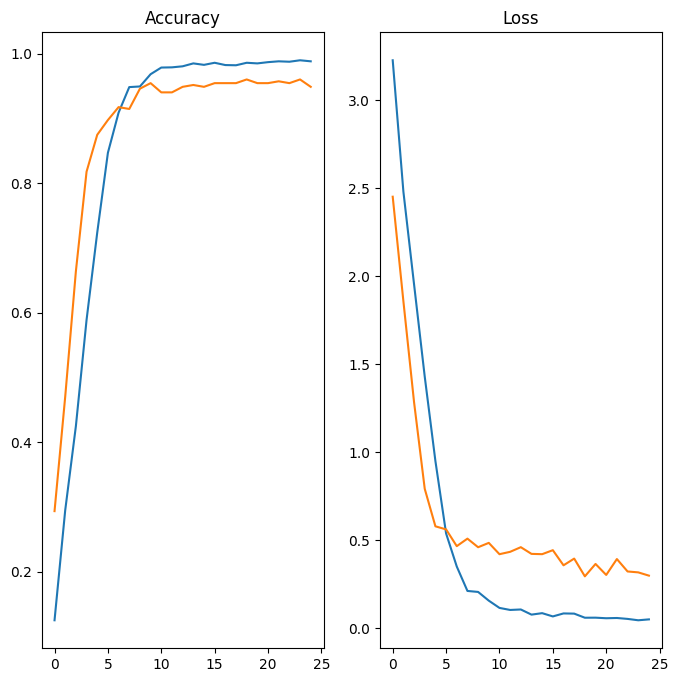

In [28]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [37]:
image = 'egg.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [38]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 49ms/step


In [39]:
score = tf.nn.softmax(predict)

In [40]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is eggplant with accuracy of 99.80


In [41]:
model.save('Image_classify.keras')